In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/rakeshrau/social-network-ads/Social_Network_Ads.csv


In [2]:
import numpy as np ## Linear Algebra 
import pandas as pd ## Data Processing
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/kaggle/input/d/rakeshrau/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
60,27,20000,0
70,25,80000,0
248,41,52000,0
195,34,43000,0
128,30,17000,0


In [6]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']


## WHEN WE WANT TO DO FEATURE SCALING WE ALWAYS HAVE TO USE TRAINING TEST SPLIT METHOD WHETHER IT IS STANDARDIZATION OR NORMALIZATION

## TRAIN TEST SPLIT

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1), df['Purchased'], test_size=0.3, random_state=42
)

print(X_train.shape, X_test.shape)


(280, 2) (120, 2)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Fit the scaler to the train set, it will learn the paramters
scaler.fit(X_train) ## seekhte humlog training data s h lekin transform dono s krte h

## Transform Train and test sets 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [10]:
X_train

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [11]:
X_train_scaled  ## THERE IS A PROBLEM IT GIVES IN A NUMPY SO WE ARE GOING TO CONVERT THIS USING DATAFRAME

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [13]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


## EFFECT OF SCALING

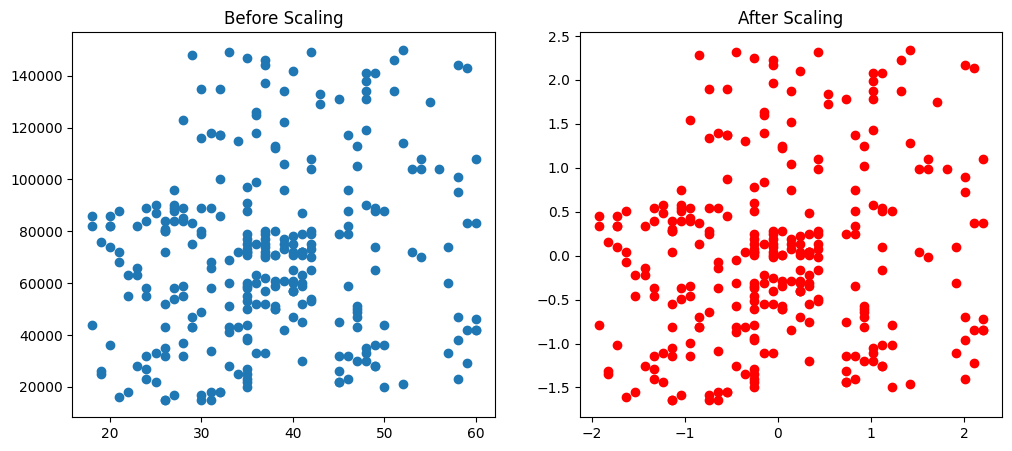

In [14]:

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

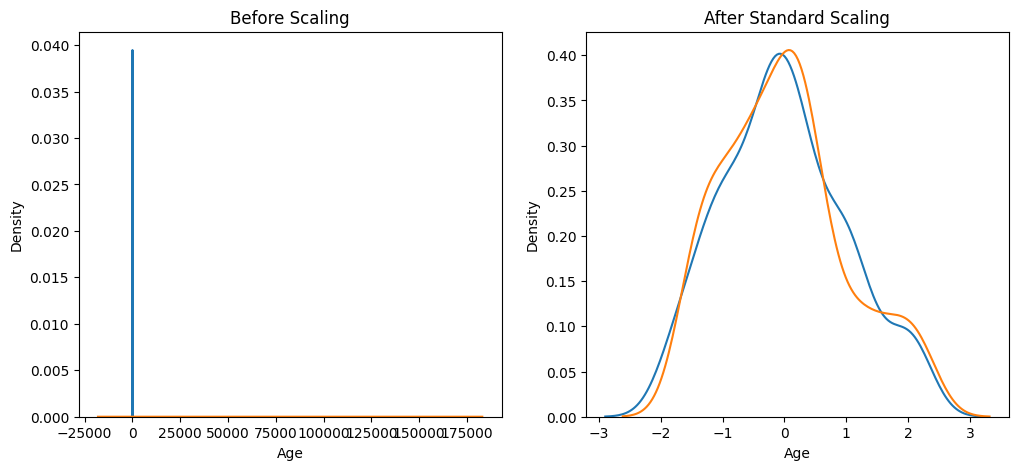

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling (DataFrame)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

## After Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()


## COMPARISION OF DISTRIBUTIONS

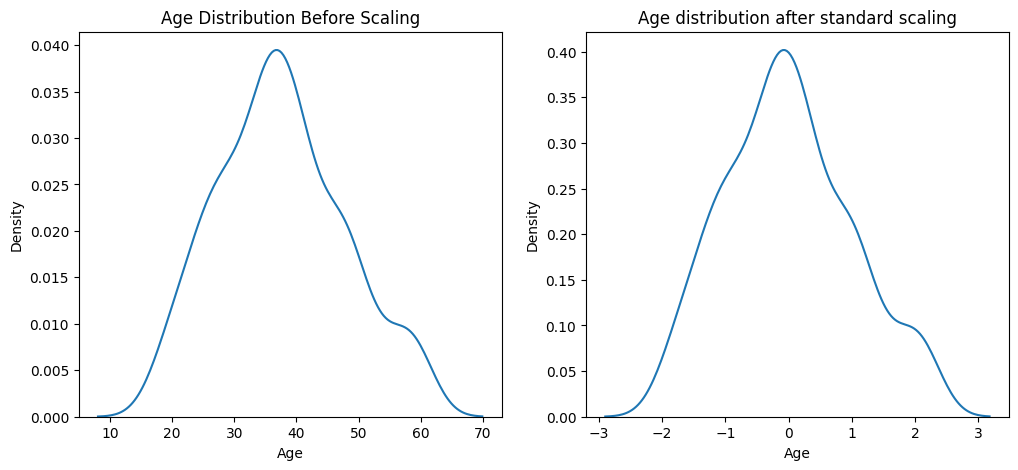

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

## BEFORE SCALING
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

## AFTER SCALING
ax2.set_title('Age distribution after standard scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

## Why scaling is important?

In [17]:
from sklearn.linear_model import LogisticRegression


In [18]:
lr =  LogisticRegression()
lr_scaled = LogisticRegression()

In [19]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [21]:
from sklearn.metrics  import accuracy_score


In [22]:
print("Actual", accuracy_score(y_test,y_pred))
print("scaled", accuracy_score(y_test,y_pred_scaled))

Actual 0.85
scaled 0.85


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt =  DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [25]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [26]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## EFFECT OF OUTLIER


In [27]:
import pandas as pd

new_rows = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 25000, 350000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_rows], ignore_index=True)


In [28]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,25000,1


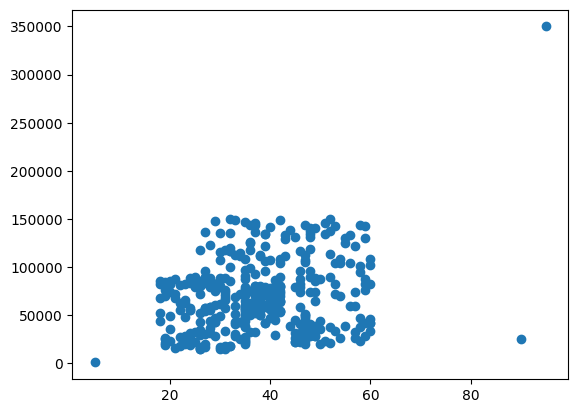

In [29]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

## transform train and test splits
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test
                                )

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled =  pd.DataFrame(X_test_scaled, columns=X_test.columns)

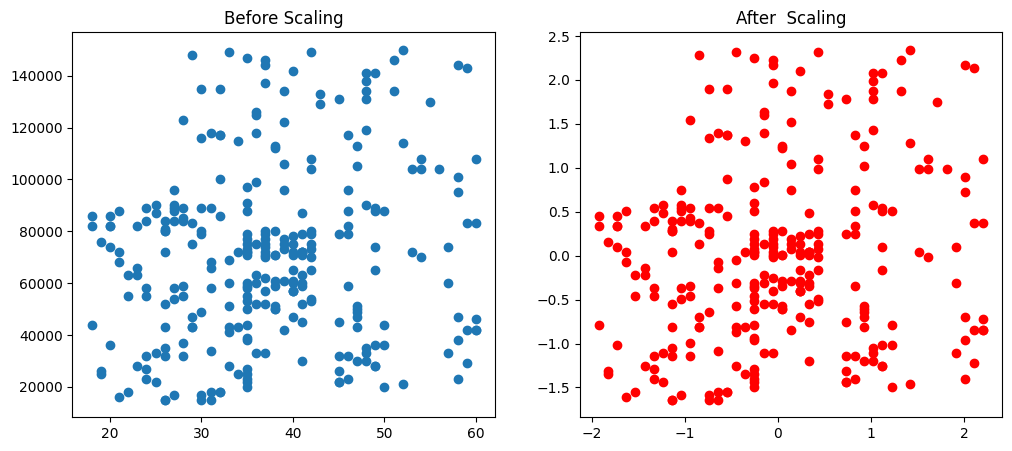

In [32]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After  Scaling")
plt.show()